# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2024

Мягкий дедлайн: 22.12.2024 23:59 MSK

Жёсткий дедлайн: 22.12.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка: 13.5__

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг. Однако с большой силой приходит и большая ответственность, так что заодно научимся, как его правильно готовить

In [1]:
from warnings import filterwarnings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (оставьте `random_state=1337` для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

---

## Задание 1. Базовый градиентный бустинг (4 балла)

Первая часть посвящена реализации собственного градиентного бустинга. Обращаем внимание, что пользоваться готовыми реализациями <font color='lightcoral'>**нельзя**</font>, если специально не оговорено. На все <font color='plum'>**вопросы**</font> должен быть <font color='plum'>**ответ**</font>. В заданиях есть референсы для параметров, которые нужно сделать, на случай, если объяснение из ноутбука непонятно, тогда советуем обратиться к соответствующей документации

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

Обязательные параметры:
 — `base_model_class` — класс базовой модели нашего бустинга
 — `base_model_params` — словарь с гиперпараметрами для базовой модели
 — `n_estimators` — какое количество базовых моделей нужно обучить
 — `learning_rate` — темп обучения, должен быть из полуинтервала $(0, 1]$

#### `fit`

В `fit` приходит выборка, на которой мы обучаем новые базовые модели

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на выборке (используем `loss_fn` для этого) и найти новую оптимальную гамму

После всего цикла обучения надо нарисовать график (если `plot=True`).

#### `partial_fit`

В `partial_fit` приходит обучающая выборка, на которую обучается новая базовая модель

#### `predict_proba`

В `predict_proba` приходит любая выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду

#### `plot_history`

В `plot_history` приходит любая выборка, для которой последовательно считаются значения функции потерь и/или любой метрики, которую вы хотите посчитать, путем последовательного применения базовых моделей. Можно делать сразу во время обучения, можно делать иначе

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

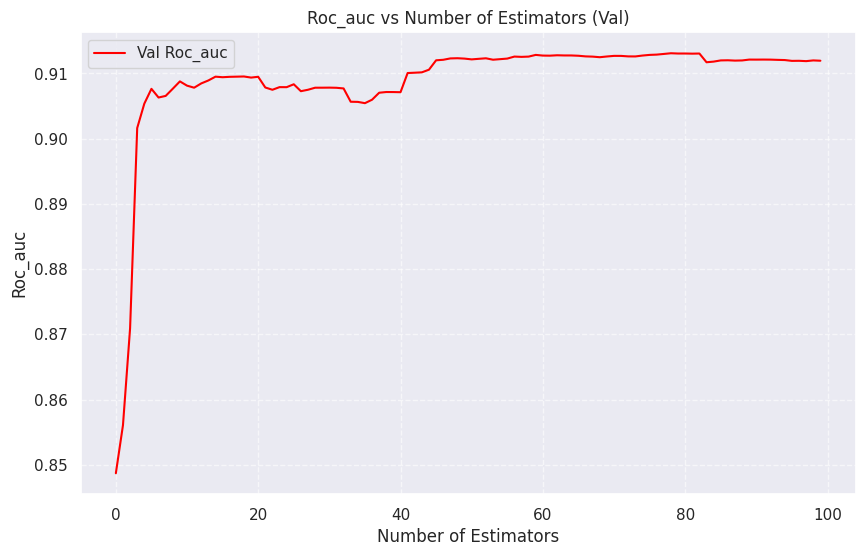

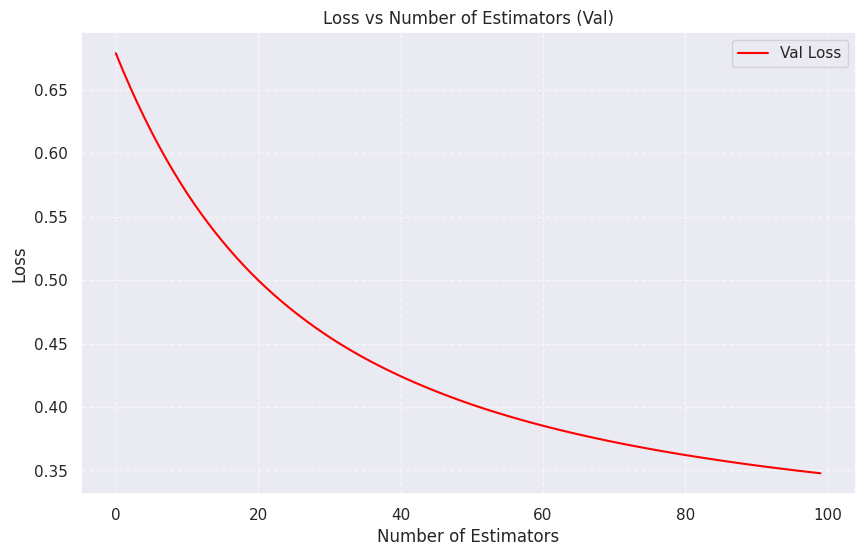

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9078
Test ROC-AUC 0.9047


In [6]:
boosting = Boosting(n_estimators=100)

boosting.fit(x_train, y_train, x_valid, y_valid)
boosting.plot_history(loss = 'roc_auc', data_type='val') #я переписал, чтобы можно было достать loss history
boosting.plot_history(loss = 'loss', data_type='val')

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

---

## Задание 2. Имплементация гиперпараметров (2.5 балла + 3.5 бонус)

Бустинг, как метод агрегации, предлагает несколько вариантов регуляризации безотносительно базовой модели. В этом пункте предлагается имплементировать часть из них. При необходимости можете обратиться к реализациям в вашей любимой библиотеке, там могут быть дополнительные пояснения и/или ссылки на оригинальные статьи

<font color='lightcoral'>**Важно!**</font> После добавления каждого параметра проверьте, как это повлияет на качество. Специально крутить параметры не нужно, но важно увидеть, что перформанс модели изменился, в худшую или в лучшую сторону, для этого какие-то параметры нужны, пусть и от балды, <font color='lightcoral'>**дефолтные параметры не подойдут**</font>, они скорее для референса. Лучше всего это видно по графикам обучения <font color='lightcoral'>**на трейне и валидации**</font>, рекомендуется смотрить именно на них

### 2.1. Борьба с переобучением (0.5 балла)

Как известно, бустинги бывают склонны к переобучению. Чтобы этого не допустить, можно контролировать процесс обучения и проверять критерий останова на валидации. Реализуйте такую процедуру, не забудьте, что всю предобработку, что вы будете делать для трейна, нужно будет повторить на валидации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| <td colspan=3>`early_stopping_rounds`, `eval_set` |

Добавьте параметры:
- `early_stopping_rounds: int | None = 0` — число раундов для критерия останова. Если качество ухудшается на протяжении всех раундов подряд, останавливаем обучение
- `X_val`, `y_val` или `eval_set: Tuple[np.ndarray] | None = None` — валидацонная выборка, на которой будем проверять переобучение

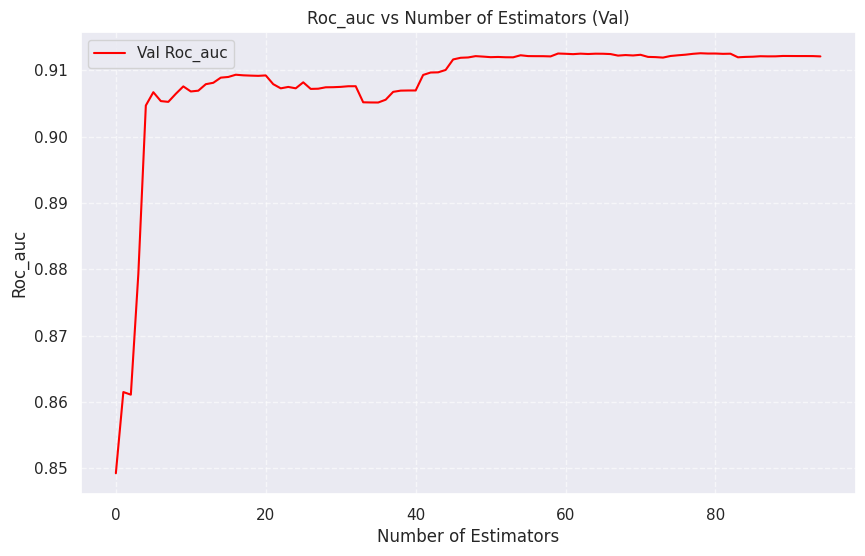

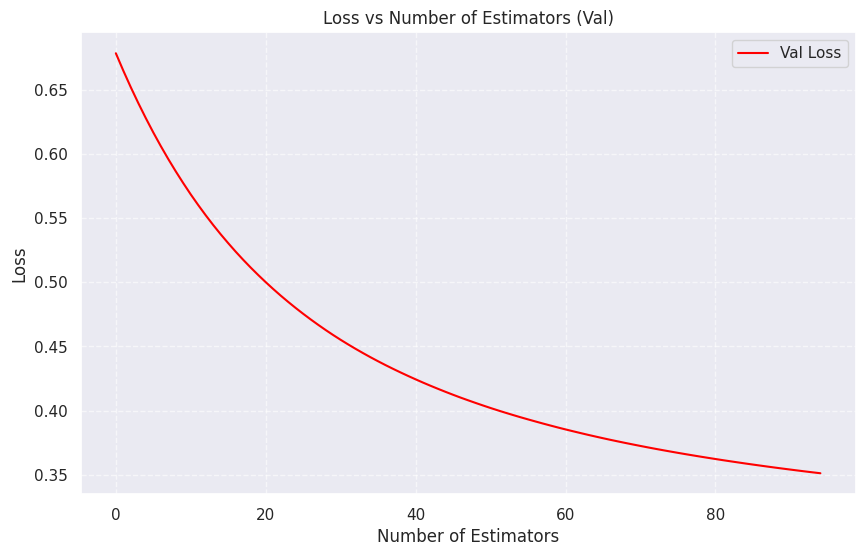

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9093
Test ROC-AUC 0.9052


In [8]:
boosting = Boosting(n_estimators=100, early_stopping_rounds=5)

boosting.fit(x_train, y_train, x_valid, y_valid) #я не признаю eval_set
boosting.plot_history(loss = 'roc_auc', data_type='val')
boosting.plot_history(loss = 'loss', data_type='val')

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

### Бонус. Бустинг линейных моделей (0.5 балла)

**<font color='plum'>Вопрос:** что произойдет при ансамблировании линейных моделей? Имеет ли это смысл?</font>

**<font color='plum'>Ответ:** При ансамблировании линейных моделей с помощью бустинга каждое последующее добавляемое линейное уравнение пытается исправить ошибки предыдущих. Однако, поскольку линейная модель описывает зависимость в виде гиперплоскости, бустинг может приводить к усложнению итоговой гиперплоскости. На практике это эквивалентно созданию более сложной линейной зависимости, которая способна лучше подстраиваться под нелинейные паттерны данных. Ансамблирование линейных моделей может улучшить качество модели, если базовая линейная регрессия недостаточно хорошо описывает зависимость. Однако это менее эффективно, чем бустинг деревьев решений, так как деревья способны лучше захватывать сложные нелинейности в данных.</font>

Давайте убедимся. Обучите бустинг, где в качестве базовой модели будет линейная регрессия. Обязательно сохраните историю функции потерь и зафиксируйте время обучения. Можно взять уже готовый из <font color='lightblue'>**XGBoost**</font>, но будьте готовы разобраться с тем, как оттуда достать историю обучения

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="gblinear")` | — | — |

Время обучения: 0.33 секунд


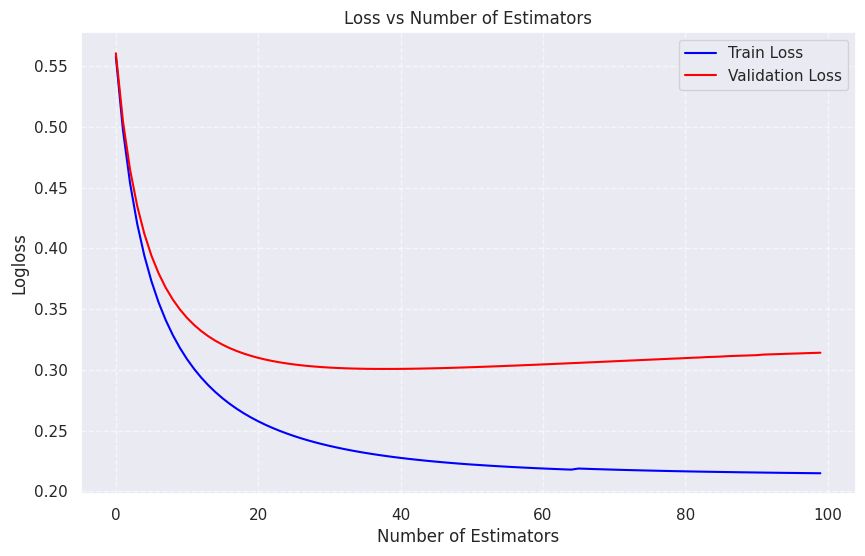

In [13]:
import xgboost as xgb
import time

params = {
    'booster': 'gblinear',
    'objective': 'binary:logistic',
    'learning_rate': 0.1}

start_time = time.time()

dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_valid, label=y_valid)

evals = [(dtrain, 'train'), (dval, 'eval')]

history = {}
model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, evals_result=history, verbose_eval=False)

end_time = time.time()
training_time = end_time - start_time

print(f"Время обучения: {training_time:.2f} секунд")

train_loss = history['train']['logloss']
val_loss_xgboost = history['eval']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss_xgboost, label='Validation Loss', color='red')
plt.xlabel('Number of Estimators')
plt.ylabel('Logloss')
plt.title('Loss vs Number of Estimators')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Теперь возьмите `sklearn.linear_model.SGDClassifier` иобучите на тех же данных. Не забудьте вытащить историю функции потерь

Время обучения: 1.59 секунд


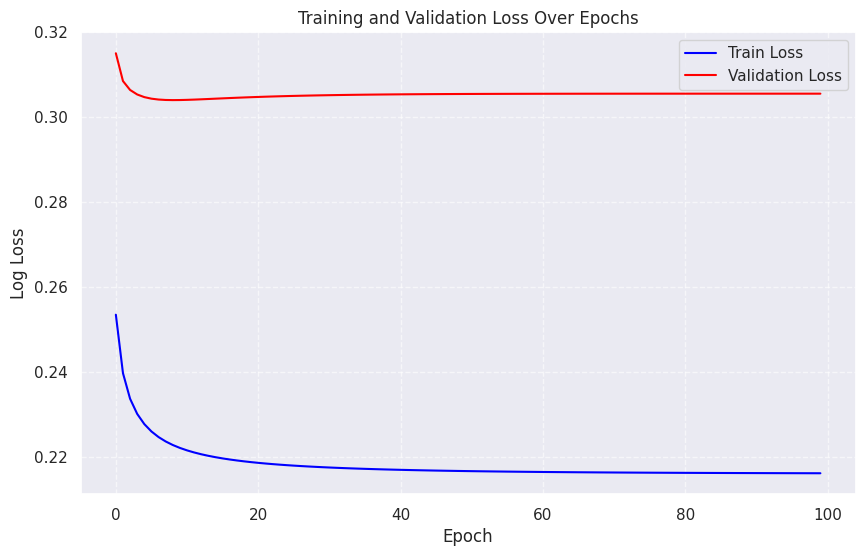

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss


sgd_clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, random_state=42)

train_losses = []
val_losses_SGDClassifier = []

start_time = time.time()

for epoch in range(100):
    sgd_clf.partial_fit(x_train, y_train, classes=np.unique(y_train))

    y_train_pred_proba = sgd_clf.predict_proba(x_train)
    y_val_pred_proba = sgd_clf.predict_proba(x_valid)

    train_loss = log_loss(y_train, y_train_pred_proba)
    val_loss = log_loss(y_valid, y_val_pred_proba)

    train_losses.append(train_loss)
    val_losses_SGDClassifier.append(val_loss)

end_time = time.time()
training_time = end_time - start_time

print(f"Время обучения: {training_time:.2f} секунд")

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses_SGDClassifier, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Покажите на одном графике изменение функции потерь для бустинга и SGD классификатора. Сравните следующие параметры у бустинга и линейной модели:

- время обучения
- число итераций до сходимости
- графики функции потерь на трейне и на валидации



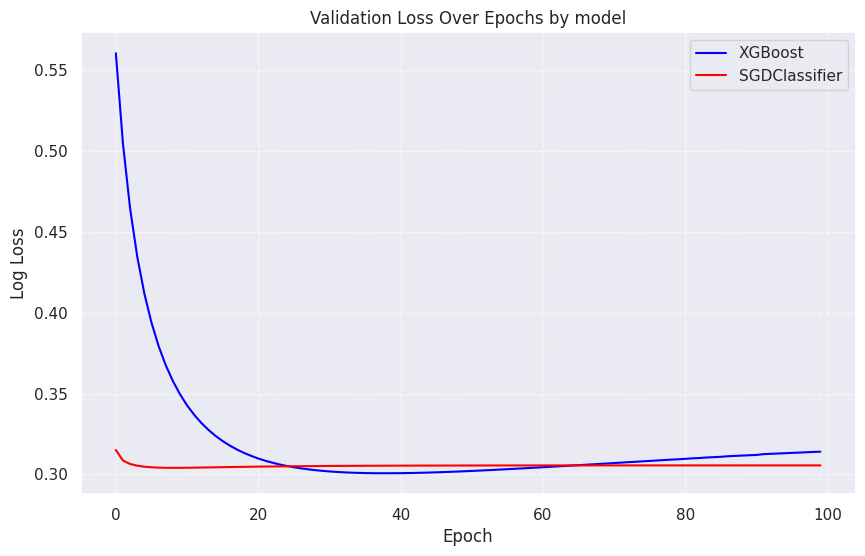

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(val_loss_xgboost, label='XGBoost', color='blue')
plt.plot(val_losses_SGDClassifier, label='SGDClassifier', color='red')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Validation Loss Over Epochs by model')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<font color='plum'>**Вопрос:** Какой вывод вы можете сделать?</font>

<font color='plum'>**Ответ:** </font>
- XGBoost быстрее обучается

- SGDClassifier быстрее сходится

- у XGBoost долго снижается ошибка, но его минимум ниже, чем у SGDClassifier, который быстро сходится, а потом ошибка растет

### 2.2. Бутстрап (0.5 балла)
Как известно, при обучении базовых алгоритмов в беггинге, используется бутстрапированная выборка. Звучит хайпово, почему бы не попробовать сделать то же самое в бустинге?

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `subsample`, — | `subsample`, `bagging`| `subsample`, `bootstrap_type`|

Вам нужно реализовать параметры:
- `subsample: float | int = 1.0` — доля или число объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей). Соответствует бутстрапу типа `Bernoulli`. Каждый объект либо входит в подвыборку, либо нет
- `bagging_temperature: float | int = 1.0` — веса объектов, которые попадают в выборку. Соответствует бутстрапу типа `Bayesian`. Каждый объект имеет определенный вес $t$, на который впоследствии домножается по формуле $w = (-\log(X))^t$, где $X \sim {U[0, 1]}$, после чего попадает в выборку. Таким образом можно сделать симуляцию повторений
- `bootstrap_type: str | None = 'Bernoulli'` — тип бутстрапа

<font color='plum'>**Вопрос:** как бутстрап может помочь в обучении с точки зрения смещения, разброса и вообще?</font>

<font color='plum'>**Ответ:** </font>

- Смещение на бутстрапированной выборке больше, чем на обычной, так как использует не все данные, однако из-за ансамблирвоания моделей смещение будет немного больше.

- Бутстрапированная выборка вводит разнообразие в обучение моделей, что уменьшает разброс итогового ансамбля.

- За счет работы на подвыборках модель с бутстрапом может избегать переобучения на редких или аномальных объектах, концентрируясь на главных закономерностях в данных. Поэтому суммарная ошибка будет меньше.

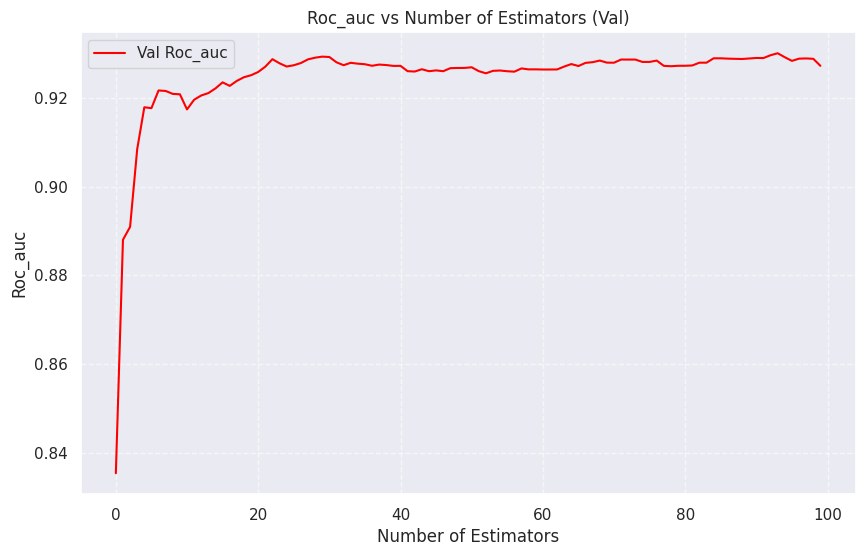

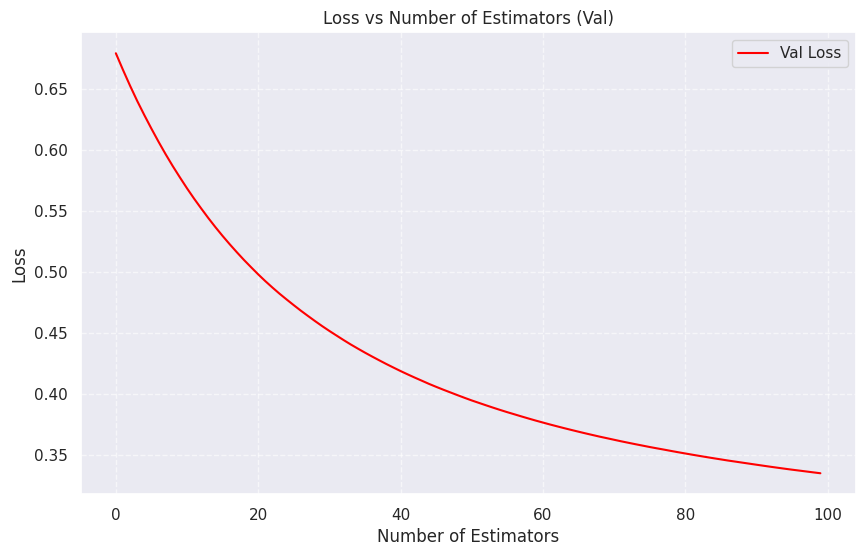

Train ROC-AUC 0.9971
Valid ROC-AUC 0.9272
Test ROC-AUC 0.9292


In [16]:
boosting = Boosting(n_estimators=100, bootstrap_type='Bernoulli', subsample=0.3)

boosting.fit(x_train, y_train, x_valid, y_valid) #я не признаю eval_set
boosting.plot_history(loss = 'roc_auc', data_type='val')
boosting.plot_history(loss = 'loss', data_type='val')

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

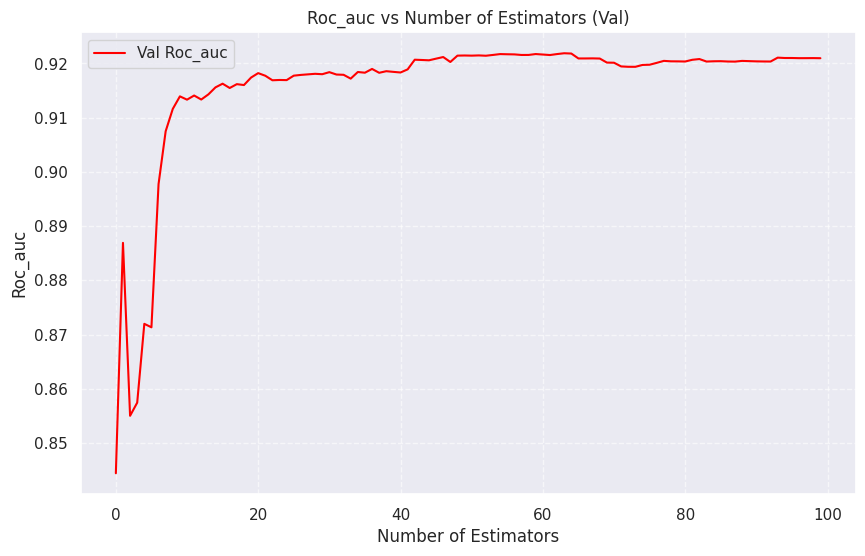

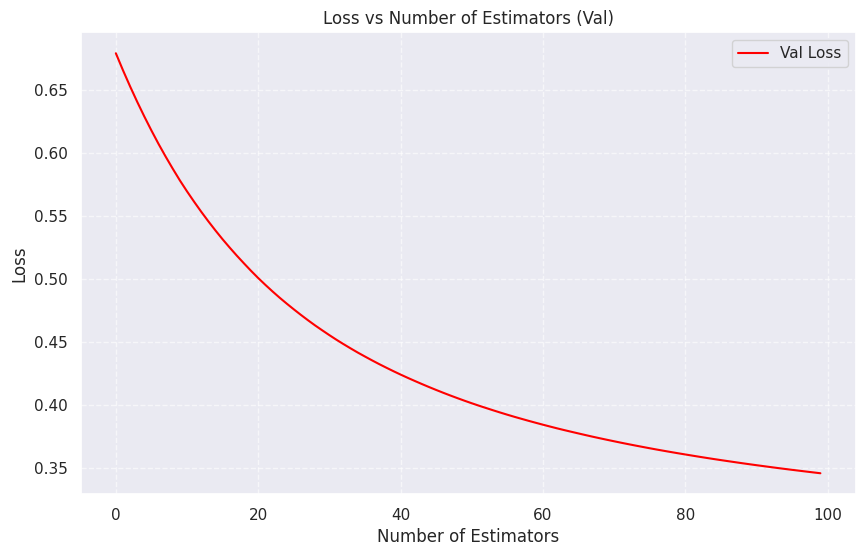

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9118
Test ROC-AUC 0.9096


In [17]:
boosting = Boosting(n_estimators=100, bootstrap_type='Bayesian', bagging_temperature=1.5)

boosting.fit(x_train, y_train, x_valid, y_valid) #я не признаю eval_set
boosting.plot_history(loss = 'roc_auc', data_type='val')
boosting.plot_history(loss = 'loss', data_type='val')

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

### Бонус. GOSS (0.5 балла)

Заметим, что во время обучения не все объекты одинаково важны. Один из вариантов это исправить — ввести какие-то веса на объекты, однако можно пойти чуть хитрее. В <font color='lightgreen'>**LightGBM**</font> придумали подход [Gradient-based One-side Sampling](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)

Давайте оценивать важность объектов в отдельный момент обучения нового дерева. Будем считать, какой антиградиент привносит каждый объект. Далее разобъем градиенты на 2 группы. Объекты с большими градиентами берутся все, с маленькими — только часть, по аналогии с бутстрапом, с отрицательными — выкидываются. И не забываем домножить на фактор, чтобы учесть выкинутые объекты. Подробнее в статье

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | `bagging='goss'`| `bootstrap_type='MVS'`|

Параметры, которые нужно сделать:

- `goss: bool | None = False` — GOSS бустинг или нет
- `goss_k: float | int = 0.2` — доля объектов, градиенты которых будем считать большими. Все остальное — маленькими
- `subsample: float | int = 0.3` — параметры сэмплинга для маленьких градиентов из пункта 2.1

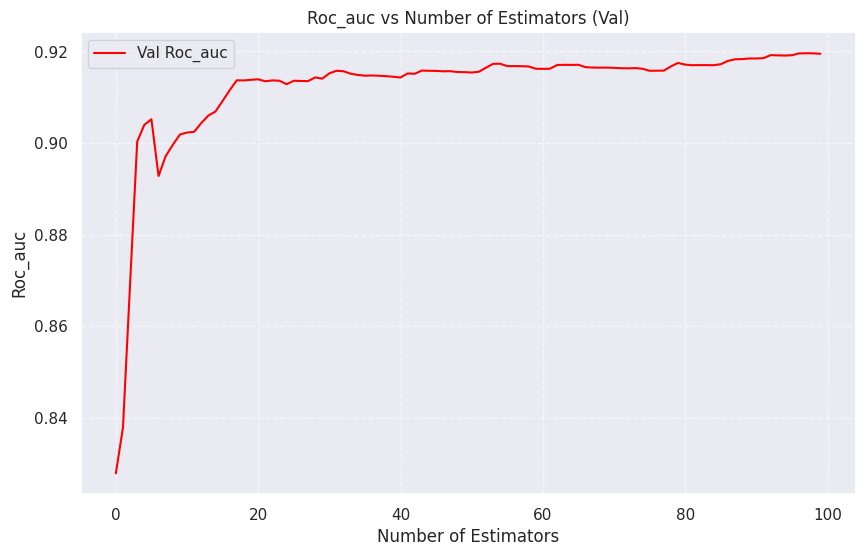

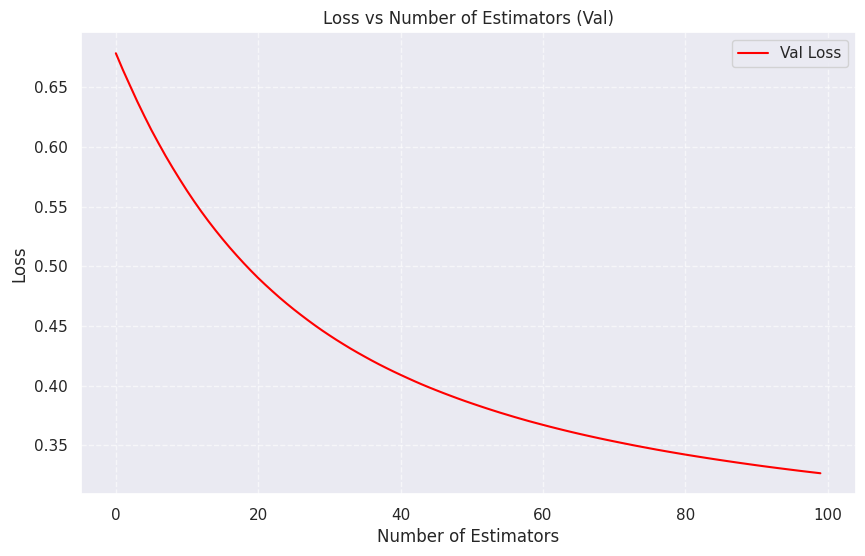

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9195
Test ROC-AUC 0.9162


In [18]:
boosting = Boosting(n_estimators=100, goss=True, goss_k=0.2, subsample=0.3)

boosting.fit(x_train, y_train, x_valid, y_valid) #я не признаю eval_set
boosting.plot_history(loss = 'roc_auc', data_type='val')
boosting.plot_history(loss = 'loss', data_type='val')

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

### 2.3. Работа с признаками (1 балл)

1. Помимо выбора случайных объектов, есть идея выбирать случайное подмножество признаков, заложенная в Random Forest. Мотивация это делать точно та же самая, что и в бутстрапировании, за это будет отвечать `rsm`

2. С другой стороны, вместо того, чтобы выкидывать признаки, можно попробовать проредить их множество значений, применив бинаризацию. В идеале это стоит делать с датасетом до обучения модели, но не обязательно, можно, например, на этапе `fit`, а в `partial_fit` приходит уже квантизованный датасет. Для этого существует множество алгоритмов, мы предлагаем сделать два наиболее простых:

- $\text{Uniform}$. Значения признака $[\min f_i, \max f_i]$ отображаются в `nbins` отрезков одинаковой длины, которые полностью покрывают интервал
- $\text{Quantile}$. Тот же самый отрезок сортируется и бьется на `nbins` квантилей от 0 до 1

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `colsample_bytree`, `tree_method` | `colsample_bytree`, `max_bin`| `rsm`, `quantize(...)`|

Нужно добавить параметры:
- `rsm: float | int = 1.0` — доля или число признаков, участвующих в обучении модели. Каждый признак либо входит, либо не входит в пул, на котором обучается базовый алгоритм, по аналогии с бутстрапом Бернулли
- `quantization_type: str | None = None` — тип квантизации, если она есть
- `nbins: int = 255` — число бинов для квантизации. Игнорируем, если тип квантизации не указан

<font color='plum'>**Вопрос**: как квантизация поможет в обработке выбросов и нанов?</font>

<font color='plum'>**Ответ**: </font> Квантизация помогает сгладить влияние выбросов, разбивая значения на интервалы. Это уменьшает чувствительность модели к экстремальным значениям, так как вместо значений используются номера интервалов. Наны можно заменить на отдельный квант, обозначающий отсутствие данных, чтобы обработать их наравне с другими значениями.

<font color='plum'>**Вопрос**: можно ли просто заполнить наны каким-то числом? Имеет ли значение, что это за число (-1, -100, -1e32)?</font>

<font color='plum'>**Ответ**: </font> заполнить наны любым числом просто так нельзя, потому что это может не иметь смысла и только ухудшить обощающую способность модели. Если все имеющиеся данные больше нуля, то любое из (-1, -100, -1e32) может быть полезно для отличия заполненных значений от нормальных данных. Однако обычно пропущенные значения заменяют на среднее/медиану или данные убирают из выборки.

In [19]:
from boosting_with_rsm import Boosting_with_rsm

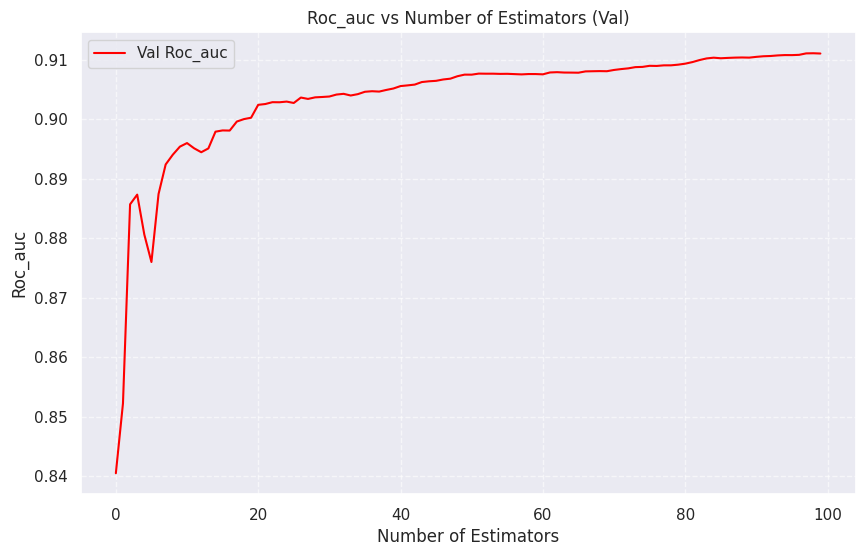

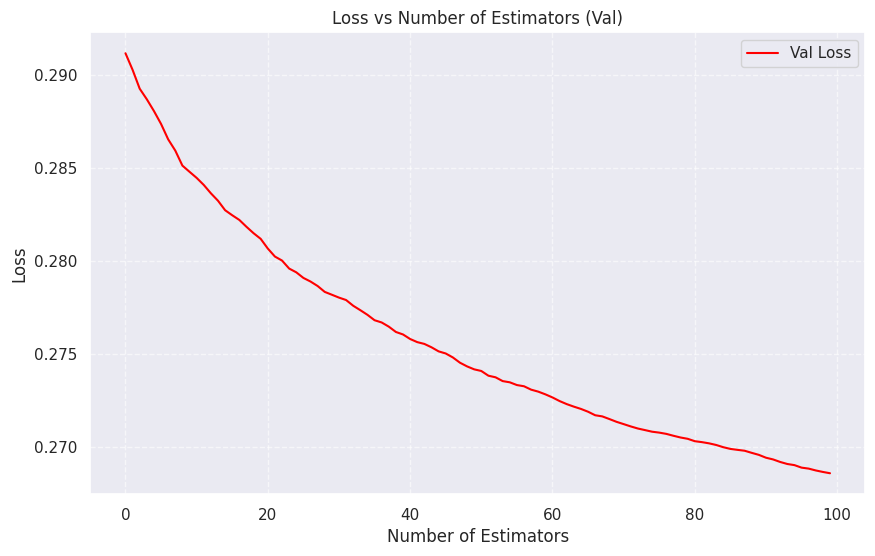

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9109
Test ROC-AUC 0.9062


In [21]:
boosting = Boosting_with_rsm(n_estimators=100, rsm=0.7)

boosting.fit(x_train, y_train, x_valid, y_valid) #я не признаю eval_set
boosting.plot_history(loss = 'roc_auc', data_type='val')
boosting.plot_history(loss = 'loss', data_type='val')

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Я сделал квантизацию. А вот с rsm проблемы. Я пытался сделать его, и даже что-то работало, но при этом при выключении данного параметра все ломалось. https://disk.yandex.ru/i/d2nwa9ajQt3nRw - тут версия boosting.py, где работает rsm. Так что я решил его не включать в дальнейшее решение. Я ее даже тут запустил)

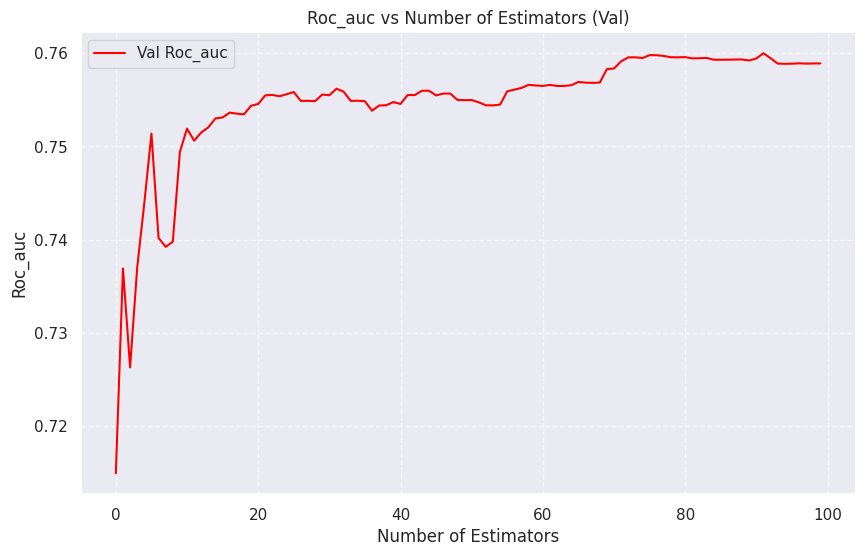

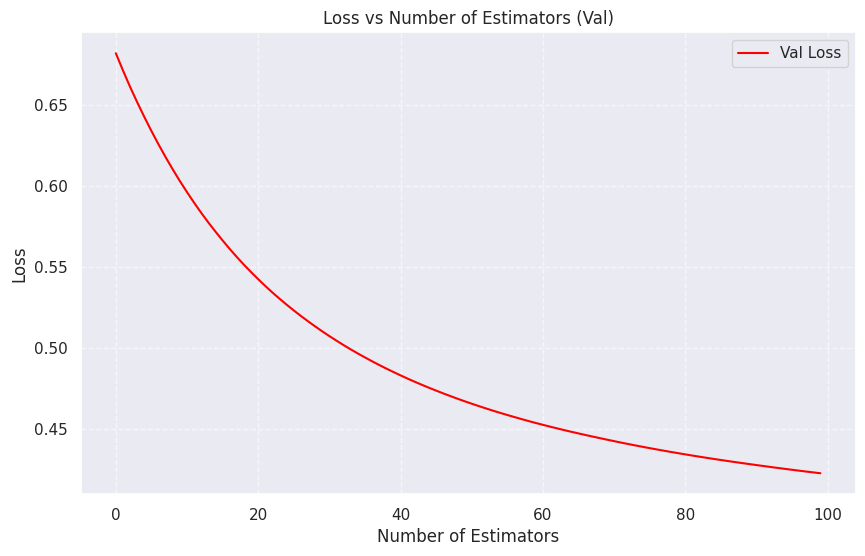

Train ROC-AUC 0.9996
Valid ROC-AUC 0.7588
Test ROC-AUC 0.8819


In [22]:
boosting = Boosting(n_estimators=100, quantization_type='Quantile', nbins=100)

boosting.fit(x_train, y_train, x_valid, y_valid) #я не признаю eval_set
boosting.plot_history(loss = 'roc_auc', data_type='val')
boosting.plot_history(loss = 'loss', data_type='val')

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

чет на валидации не очень тут получается...

### Бонус. Квантизация (1 балл)

В текущих имплементациях бустинга используются более сложные методы квантизации. К сожалению, способы выше страдают либо от неравноправности бинов — в каких-то объектов больше, в каких-то меньше, либо от того, что целевая переменная от бинов зависит опосредованно. Предлагается это исправить следующими способами:

1. $\text{MinEntropy}$. Это [один из методов](https://catboost.ai/docs/en/concepts/quantization), который используется для бинаризации в <font color='palegoldenrod'>**CatBoost**</font>, остальные на него очень похожи. Будем жадно набирать бины так, чтобы энтропия объектов внутри ($\sum_{i \in \text{bin}} x_i\log(x_i)$) была как можно меньше. Сделать такое разбиение руками непросто, но вам эта задача должна что-то напоминать
   
2. $\text{PiecewiseEncoding}$. Это относительно свежий метод для [табличных трансформеров](https://arxiv.org/pdf/2203.05556). Суть заключается в том, что бины для квантизации будем брать не с потолка, а именно те, что нужны для разбиения таргета. (В статье делается кодирование в вектор длины $T$, где $T$ число бинов, в нашем случае это излишне, бинов можно оставить столько же, но взять лмшь закодированную по формуле часть)

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | — | `feature_border_type="MinEntropy"` |

Нужно добавить опцию:

- `'MinEntropy'` для `quantization_type` — какую квантизацию используем

Реализуйте оба способа подсчета (или один, но тогда балл неполный) и сравните, удалось ли улучшить качество?

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 2.4. Важность признаков (0.5 балла)

Поскольку наша базовая модель — это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными — иначе вы что-то сделали не так). Разумеется, способ не единственный, если хочется, посмотрите в документации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `model.get_score()` | `lightgbm.importance()` | `model.get_feature_importance()` |

Допишите к бустингу:
- `feature_importances_` — атрибут, который возвращает важность признаков, согласно методу выше

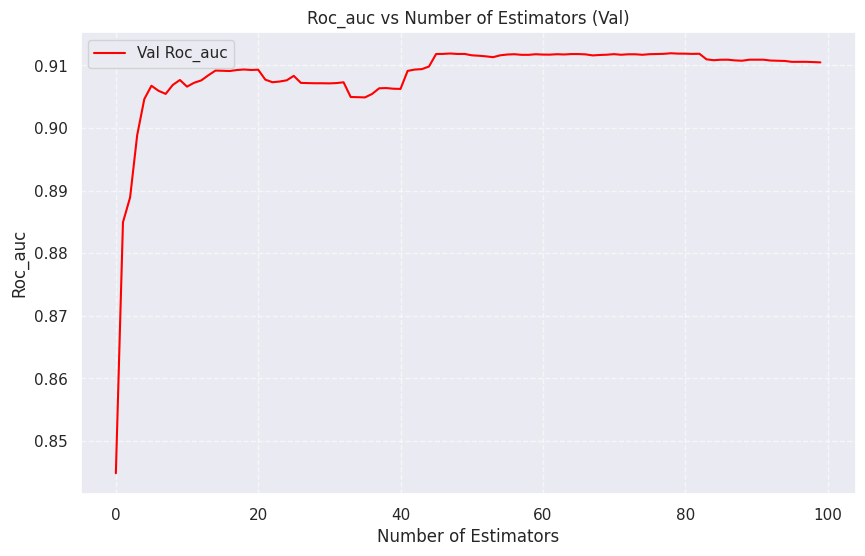

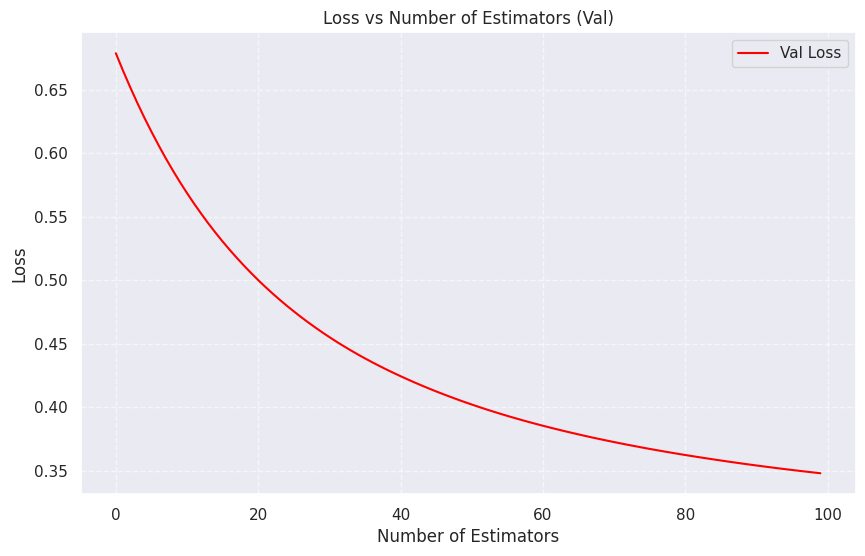

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9070
Test ROC-AUC 0.9046


In [23]:
boosting = Boosting(n_estimators=100)

boosting.fit(x_train, y_train, x_valid, y_valid) #я не признаю eval_set
boosting.plot_history(loss = 'roc_auc', data_type='val')
boosting.plot_history(loss = 'loss', data_type='val')
boosting.compute_feature_importances(x_train)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Покажите, какие признаки оказались самыми важными

In [24]:
feature_importances = boosting.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
for idx in sorted_indices[:10]:
    print(f"Feature {idx}: Importance {feature_importances[idx]}")

Feature 166: Importance 0.5571560111609672
Feature 164: Importance 0.17761641399552724
Feature 168: Importance 0.03017429285538877
Feature 165: Importance 0.030034174863367707
Feature 36: Importance 0.0138091361353265
Feature 158: Importance 0.013294260406894144
Feature 142: Importance 0.012035455207909536
Feature 162: Importance 0.009742514701404009
Feature 161: Importance 0.008917239038140713
Feature 167: Importance 0.008826857359056977


### Бонус. DART (1.5 балла)

Ранее мы обсуждали, что каждый базовый алгоритм пытается исправить ошибки всего предыдущего ансамбля. Из-за этого возникает неравноправие — каждая новая модель вносит все меньший и меньший вклад. Уверенные обучатели нейросетей знают, что это может привести к переобучению. Но выход есть, и выход этот [DART](https://arxiv.org/pdf/1505.01866)!

В DL есть такой вид регуляризации, как dropout, когда некоторые узлы нейросети со случайным шансом отключаются. Можно попробовать обобщить этот подход на случай бустингов и случайно выкидывать деревья из композиции во время обучения

1. Выбираем, какие деревья убрать. При подсчете антиградиента берем не весь ансамбль, а только ту часть, что осталась
2. Домножаем выходы дерева на $1/k$, где $k$ — число удаленных деревьев, чтобы учесть тот факт, что ансамбль был не весь. Тогда вклад отдельного дерева будет не настолько большим
3. Домножаем выходы выкинутых деревьев на $k/(k+1)$, чтобы масштабы выходов примерно совпадали

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="dart")` | `LGBMClassifier(boosting_type="dart")` | — |

Параметры, которые нужно добавить:

- `dart: bool | None = False` — DART бустинг или нет
- `dropout_rate: int | float = 0.05` — доля деревьев, которую выкидываем во время обучения DART

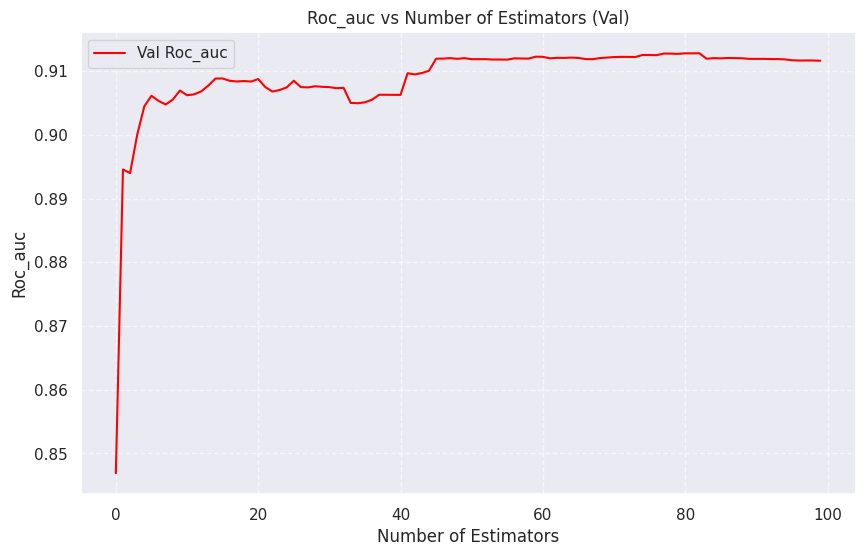

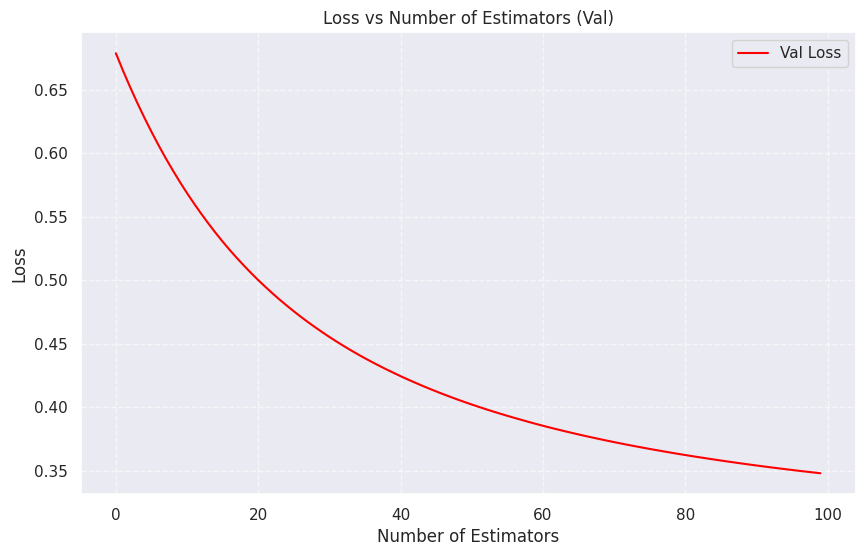

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9100
Test ROC-AUC 0.9062


In [29]:
boosting = Boosting(n_estimators=100, dart=True, dropout_rate=0.1)

boosting.fit(x_train, y_train, x_valid, y_valid)
boosting.plot_history(loss = 'roc_auc', data_type='val')
boosting.plot_history(loss = 'loss', data_type='val')
boosting.compute_feature_importances(x_train)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

------

## Задание 3. Оптимизация (3.5 балла + 0.5 бонус)

Теперь давайте подумаем, как же правильно применять бустинги. Нас интересует: какие бустинги вообще бывают, как их правильно тюнить, и как интерпретировать

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. У бустингов, хотя на самом деле не только, эта проблема стоит особенно остро. Подумаем, как это делать умнее

### 3.1. Знакомство с optuna (1 балл)

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас

Подберите на валидации оптимальные значения следующих гиперпараметров для вашей реализации бустинга:
- `max_depth`
- `n_estimators`
- `learning_rate`
- любые другие параметры, которые вам понравились

Заметим, что оптуна это крайне гибкая библиотека, в которой можно реализовать абсолютно любую логику, которую пожелаете. За вас там есть лишь выбор модели. Чтобы не плодить несколько `objective`, можно слегка менять тело функции, например, добавить опциональные параметры, но шаблоном пользоваться не обязательно, как обычно

Подберите диапазон параметров самостоятельно, не забывайте фиксировать сид (нет, его не нужно перебирать). Сохраните и покажите оптимальный набор параметров. Сравните графики функций потерь для оптимального и дефолтного бустингов. Покажите, какие параметры дали наибольший прирост (для этого придется почитать документацию оптуны)

In [28]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.3 MB/s eta 0:00:00


In [30]:
import optuna

def objective(trial, x_train = x_train, y_train = y_train, x_valid = x_valid, y_valid = y_valid):
    base_model_params = {
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 10),

    }

    n_estimators = trial.suggest_int("n_estimators", 10, 300)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.5, log=True)
    early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 2, 10)
    subsample = trial.suggest_float("subsample", 0.1, 1.0)
    bootstrap_type = trial.suggest_categorical("bootstrap_type", ["Bernoulli", "Bayesian", None])
    goss = trial.suggest_categorical("goss", [True, False])
    goss_k = trial.suggest_float("goss_k", 0.01, 0.5)
    dart = trial.suggest_categorical("dart", [True, False])
    dropout_rate = trial.suggest_float("dropout_rate", 0.01, 0.3)

    model = Boosting(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        early_stopping_rounds=early_stopping_rounds,
        subsample=subsample,
        bootstrap_type=bootstrap_type,
        goss=goss,
        goss_k=goss_k,
        dart=dart,
        dropout_rate=dropout_rate,
        base_model_params=base_model_params,
    )

    model.fit(x_train, y_train, x_valid, y_valid)
    model_score = model.score(x_valid, y_valid)

    return model_score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2024-12-22 08:44:10,131] A new study created in memory with name: no-name-f90772d2-0d8a-4029-a0c3-204a15d33b58
[I 2024-12-22 08:44:11,657] Trial 0 finished with value: 0.9342801474737653 and parameters: {'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 9, 'n_estimators': 60, 'learning_rate': 0.002201252617292281, 'early_stopping_rounds': 3, 'subsample': 0.21182965803801299, 'bootstrap_type': 'Bernoulli', 'goss': False, 'goss_k': 0.3938148321337457, 'dart': True, 'dropout_rate': 0.0633864062548857}. Best is trial 0 with value: 0.9342801474737653.
[I 2024-12-22 08:44:29,742] Trial 1 finished with value: 0.5 and parameters: {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 4, 'n_estimators': 187, 'learning_rate': 0.031264158609776764, 'early_stopping_rounds': 9, 'subsample': 0.24828225218515207, 'bootstrap_type': 'Bernoulli', 'goss': False, 'goss_k': 0.11174957540877588, 'dart': True, 'dropout_rate': 0.20872400764146704}. Best is trial 0 with value: 0.93428014747

Number of finished trials:  50
Best trial:
Value:  0.9392664465255944
Params: 
    max_depth: 10
    min_samples_split: 2
    min_samples_leaf: 8
    n_estimators: 61
    learning_rate: 0.0049821973644763404
    early_stopping_rounds: 10
    subsample: 0.3402817667738881
    bootstrap_type: None
    goss: True
    goss_k: 0.08116315613545538
    dart: False
    dropout_rate: 0.19347943435341505


50 триалов заняло 11 минут

### 3.2. Глубокая оптимизация (1 балл)

Помимо эффективного перебора гиперпараметров, `optuna` предлагает более тонкий контроль над самой процедурой обучения. Улучшите процедуру оптимизации следующим образом:

1. Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин
2. Посмотрите, как можно контролировать процесс обучения бустинга при помощи прунера. У библиотечных имплементаций есть уже готовые, их можно использовать пунктом ниже. Для кастомной модели возьмите что-то из `optuna.pruners`. Идея прунера — не обучать бустинг до конца, если по истории видно, что другие бустинги на этом этапе статистически лучше.
3. Добавьте сохранение истории функции потерь и времени обучения в качестве `user_attribute` сразу в `study`. Мы не хотим оптимизировать их напрямую, но они нам понадобится для сравнения моделей в дальнейшем

Добавьте хранилище и юзер атрибуты и посмотрите, ускорилась ли оптимизация с добавлением прунера

In [33]:
import optuna

storage = "sqlite:///optuna_study.db"

def objective(trial, x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid):
    base_model_params = {
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
    }

    n_estimators = trial.suggest_int("n_estimators", 10, 300)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.5, log=True)
    early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 2, 20)
    subsample = trial.suggest_float("subsample", 0.1, 1.0)
    bootstrap_type = trial.suggest_categorical("bootstrap_type", ["Bernoulli", "Bayesian", None])
    goss = trial.suggest_categorical("goss", [True, False])
    goss_k = trial.suggest_float("goss_k", 0.01, 0.5)
    dart = trial.suggest_categorical("dart", [True, False])
    dropout_rate = trial.suggest_float("dropout_rate", 0.01, 0.3)

    model = Boosting(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        early_stopping_rounds=early_stopping_rounds,
        subsample=subsample,
        bootstrap_type=bootstrap_type,
        goss=goss,
        goss_k=goss_k,
        dart=dart,
        dropout_rate=dropout_rate,
        base_model_params=base_model_params,
    )

    start_time = time.time()
    model.fit(x_train, y_train, x_valid, y_valid)
    elapsed_time = time.time() - start_time

    model_score = model.score(x_valid, y_valid)

    trial.set_user_attr("elapsed_time", elapsed_time)
    trial.set_user_attr("loss_history", model.history["loss"])

    return model_score

study_boosting = optuna.create_study(
    study_name="my_boosting_optimization",
    direction="maximize",
    storage=storage,
    load_if_exists=True,
    pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)
)

study_boosting.optimize(objective, n_trials=50)

print("Number of finished trials: ", len(study_boosting.trials))
print("Best trial:")
trial = study_boosting.best_trial
print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

print("\nBest trial user attributes:")
for key, value in trial.user_attrs.items():
    print(f"    {key}: {value}")

[I 2024-12-22 08:58:02,270] A new study created in RDB with name: my_boosting_optimization
[I 2024-12-22 08:58:07,102] Trial 0 finished with value: 0.9366727249362046 and parameters: {'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 8, 'n_estimators': 25, 'learning_rate': 0.010918038807776479, 'early_stopping_rounds': 18, 'subsample': 0.5629008467704476, 'bootstrap_type': 'Bernoulli', 'goss': False, 'goss_k': 0.44537749176048846, 'dart': False, 'dropout_rate': 0.2426817752559413}. Best is trial 0 with value: 0.9366727249362046.
[I 2024-12-22 08:58:09,808] Trial 1 finished with value: 0.9243267059536269 and parameters: {'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 9, 'n_estimators': 14, 'learning_rate': 0.012077390348845066, 'early_stopping_rounds': 6, 'subsample': 0.3312713750986031, 'bootstrap_type': None, 'goss': False, 'goss_k': 0.2148816286857204, 'dart': False, 'dropout_rate': 0.08130530600179381}. Best is trial 0 with value: 0.9366727249362046.
[I 2024-1

Number of finished trials:  50
Best trial:
Value:  0.9393809869312191
Params: 
    max_depth: 9
    min_samples_split: 7
    min_samples_leaf: 2
    n_estimators: 134
    learning_rate: 0.004567390638273621
    early_stopping_rounds: 6
    subsample: 0.5451967637701688
    bootstrap_type: Bayesian
    goss: True
    goss_k: 0.2452778770059617
    dart: False
    dropout_rate: 0.2483427193050516

Best trial user attributes:
    elapsed_time: 20.10952925682068
    loss_history: []


Быстрее не стало, все то же самое как будто

### 3.3. Готовые реализации (1 балл)

Библиотек для бустингов существует много, но активно используются лишь три. Ваша задача — попробовать их в деле, посмотреть на их уникальные фишки и понять, что вам нравится больше всего

Возьмите любую из популярных библиотек: <font color='lightblue'>`xgboost`</font>, <font color='lightgreen'>`lightgbm`</font>, <font color='palegoldenrod'>`catboost`</font>.
Ваша задача — взять одну из них, подобрать те же оптимальные параметры, что и выше, плюс что-то, что вам понравилось в них больше всего (может быть абсолютно любая фишка из пунктов выше или что-то, что вы найдете сами, не обязательно эксклюзивное), и сравнить две оптимизированные модели по
- динамике функции потерь (на обучающей и на валидационной выборке)
- времени обучения

In [34]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00


In [36]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

def objective(trial, x_train = x_train, y_train = y_train, x_valid = x_valid, y_valid = y_valid):
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 1, 20)
    n_estimators = trial.suggest_int("n_estimators", 10, 300)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.5, log=True)
    early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 2, 10)
    subsample = trial.suggest_float("subsample", 0.1, 1.0)
    bootstrap_type = trial.suggest_categorical("bootstrap_type", ["Bernoulli", None])
    rsm = trial.suggest_float("rsm", 0.1, 1.0)
    grow_policy = trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"])
    random_strength = trial.suggest_float("random_strength", 0, 5)

    model = CatBoostClassifier(
        iterations=n_estimators,
        learning_rate=learning_rate,
        early_stopping_rounds=early_stopping_rounds,
        subsample=subsample,
        bootstrap_type=bootstrap_type,
        rsm=rsm,
        grow_policy=grow_policy,
        random_strength=random_strength,
        depth=max_depth,
        min_data_in_leaf=min_data_in_leaf,
        loss_function='Logloss',
        verbose=False
    )

    model.fit(x_train, y_train, eval_set=(x_valid, y_valid))
    catboost_probs = model.predict_proba(x_test)[:, 1]
    catboost_roc_auc = roc_auc_score(y_test, catboost_probs)

    return catboost_roc_auc

study_catboost = optuna.create_study(study_name="catboost__optimization", direction="maximize")
study_catboost.optimize(objective, n_trials=50)

print("Number of finished trials: ", len(study_catboost.trials))
print("Best trial:")
trial = study_catboost.best_trial
print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2024-12-22 09:12:43,384] A new study created in memory with name: catboost__optimization
[I 2024-12-22 09:12:46,530] Trial 0 finished with value: 0.9370732125903171 and parameters: {'max_depth': 10, 'min_data_in_leaf': 11, 'n_estimators': 214, 'learning_rate': 0.13314667565867974, 'early_stopping_rounds': 3, 'subsample': 0.410475013624198, 'bootstrap_type': None, 'rsm': 0.15772930529538629, 'grow_policy': 'Lossguide', 'random_strength': 2.6429092186578163}. Best is trial 0 with value: 0.9370732125903171.
[I 2024-12-22 09:12:53,548] Trial 1 finished with value: 0.9391200602088099 and parameters: {'max_depth': 9, 'min_data_in_leaf': 15, 'n_estimators': 172, 'learning_rate': 0.024650445459936582, 'early_stopping_rounds': 9, 'subsample': 0.8290424130395794, 'bootstrap_type': 'Bernoulli', 'rsm': 0.37027420049699744, 'grow_policy': 'Lossguide', 'random_strength': 1.3911833474044526}. Best is trial 1 with value: 0.9391200602088099.
[I 2024-12-22 09:12:55,342] Trial 2 finished with value: 0

Number of finished trials:  50
Best trial:
Value:  0.9407288037120368
Params: 
    max_depth: 9
    min_data_in_leaf: 10
    n_estimators: 80
    learning_rate: 0.09364347993303344
    early_stopping_rounds: 10
    subsample: 0.4580748271452163
    bootstrap_type: None
    rsm: 0.7855501820891349
    grow_policy: Lossguide
    random_strength: 1.1880678126456252


<font color='plum'>**Вопрос:** Какая архитектура вам нравится больше всего и почему?</font>

<font color='plum'>**Ответ**: </font> я, конечно, свою очень люблю, но катбуст меня переиграл и по скорости, и по качеству немного(

### Бонус. Random Forest (0.5 балла)

Если очень захотеть, оптуна может оптимизировать все, что угодно, даже нейросети. Давайте противопоставим бустингу его злейшего врага — алгоритм Random Forest.

Возьмите реализацию случайного леса из <font color='lightgreen'>`lightgbm`</font>. Посмотрите, какие там есть гиперпараметры, переберите что-либо из них вместе с `max_depth` и `n_estimators`.

Сравните его качество и динамику функции потерь (на обучающей и на валидационной выборке) с таковыми у бустинга и сделайте вывод, а нужен ли Random Forest?

In [37]:
import lightgbm as lgb
import optuna
from sklearn.metrics import mean_squared_error

def objective_rf(trial):
    params = {
        "objective": "binary",
        "boosting_type": "rf",
        "num_leaves": trial.suggest_int("num_leaves", 10, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 100),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 10.0),
        "verbosity": -1,
    }

    train_data = lgb.Dataset(x_train, label=y_train)
    valid_data = lgb.Dataset(x_valid, label=y_valid, reference=train_data)

    model = lgb.train(
        params,
        train_data,
        valid_sets=[valid_data],
        valid_names=["valid"],
    )

    y_pred_proba = model.predict(x_valid)
    roc_auc = roc_auc_score(y_valid, y_pred_proba)
    return roc_auc

study_rf = optuna.create_study(study_name="rf_optimization", direction="maximize")
study_rf.optimize(objective_rf, n_trials=50)

print("Best trial:")
print("  Value: ", study_rf.best_trial.value)
print("  Params: ")
for key, value in study_rf.best_trial.params.items():
    print(f"    {key}: {value}")


[I 2024-12-22 09:14:14,533] A new study created in memory with name: rf_optimization
[I 2024-12-22 09:14:15,380] Trial 0 finished with value: 0.9251033457771307 and parameters: {'num_leaves': 19, 'max_depth': 6, 'n_estimators': 339, 'bagging_fraction': 0.5433930499799736, 'bagging_freq': 3, 'feature_fraction': 0.8863605839252741, 'min_data_in_leaf': 85, 'lambda_l2': 2.207187968359785}. Best is trial 0 with value: 0.9251033457771307.
[I 2024-12-22 09:14:15,726] Trial 1 finished with value: 0.9255311761423908 and parameters: {'num_leaves': 69, 'max_depth': 4, 'n_estimators': 119, 'bagging_fraction': 0.9850784389723832, 'bagging_freq': 4, 'feature_fraction': 0.6284960249363367, 'min_data_in_leaf': 74, 'lambda_l2': 3.667706838978617}. Best is trial 1 with value: 0.9255311761423908.
[I 2024-12-22 09:14:16,260] Trial 2 finished with value: 0.9296650072276192 and parameters: {'num_leaves': 64, 'max_depth': 7, 'n_estimators': 132, 'bagging_fraction': 0.6300043162418278, 'bagging_freq': 4, 'fea

Best trial:
  Value:  0.9389020723432413
  Params: 
    num_leaves: 81
    max_depth: 8
    n_estimators: 317
    bagging_fraction: 0.9410055078116586
    bagging_freq: 8
    feature_fraction: 0.5301062547058595
    min_data_in_leaf: 10
    lambda_l2: 2.0206331872484125


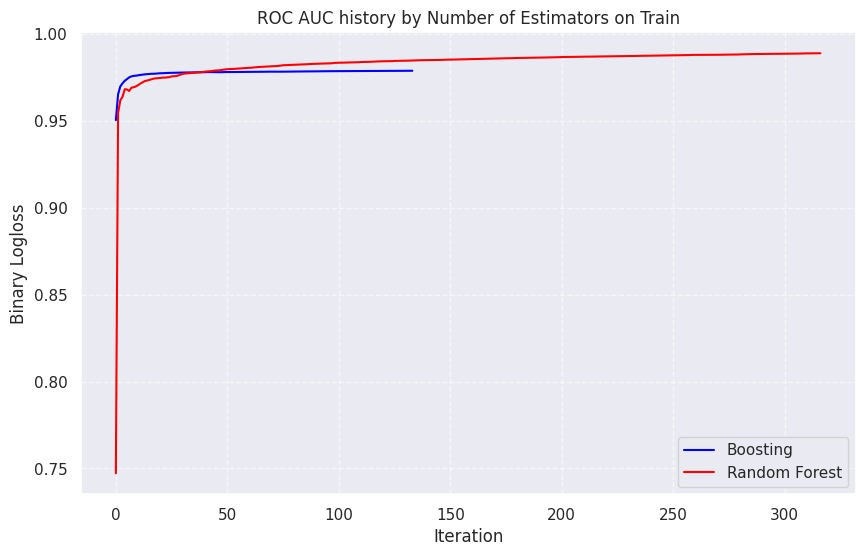

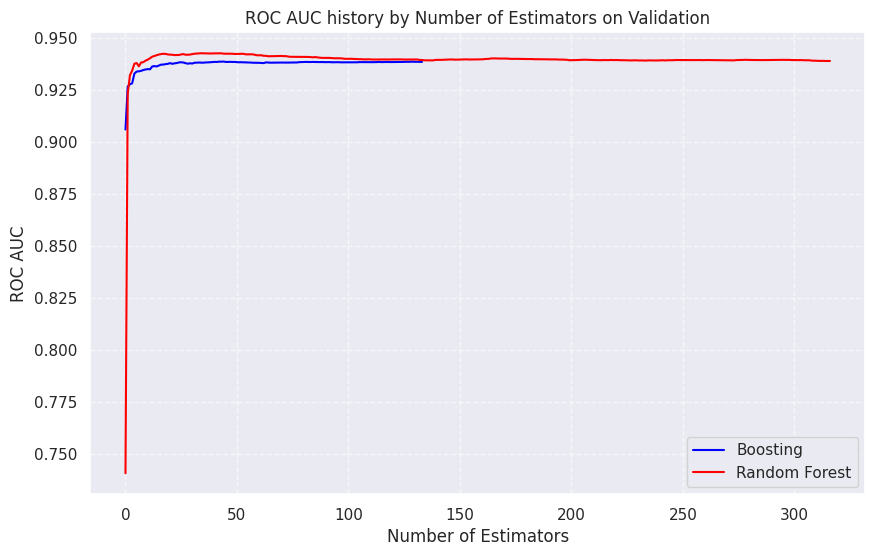

In [49]:
best_rf_params = study_rf.best_trial.params

train_data = lgb.Dataset(x_train, label=y_train)
valid_data = lgb.Dataset(x_valid, label=y_valid, reference=train_data)

train_auc_history = []
valid_auc_history = []

def record_auc(env):
    if env.evaluation_result_list:
        train_preds = env.model.predict(x_train)
        train_auc = roc_auc_score(y_train, train_preds)
        train_auc_history.append(train_auc)

        valid_preds = env.model.predict(x_valid)
        valid_auc = roc_auc_score(y_valid, valid_preds)
        valid_auc_history.append(valid_auc)

rf_model = lgb.train(
    params=best_rf_params,
    train_set=train_data,
    valid_sets=[valid_data],
    valid_names=["valid"],
    callbacks=[record_auc]
)

best_params = study_boosting.best_trial.params
boosting = Boosting(
    base_model_params={
        "max_depth": best_params.get("max_depth"),
        "min_samples_split": best_params.get("min_samples_split"),
        "min_samples_leaf": best_params.get("min_samples_leaf"),
    },
    n_estimators=best_params.get("n_estimators"),
    learning_rate=best_params.get("learning_rate"),
    early_stopping_rounds=best_params.get("early_stopping_rounds"),
    subsample=best_params.get("subsample"),
    bootstrap_type=best_params.get("bootstrap_type"),
    goss=best_params.get("goss"),
    goss_k=best_params.get("goss_k"),
    dart=best_params.get("dart"),
    dropout_rate=best_params.get("dropout_rate"))
boosting.fit(x_train, y_train, x_valid, y_valid)

plt.figure(figsize=(10, 6))
plt.plot(boosting.history['train_roc_auc'], label=f'Boosting', color='blue')
plt.plot(train_auc_history, label="Random Forest", color="red")
plt.xlabel("Iteration")
plt.ylabel("Binary Logloss")
plt.title(f'ROC AUC history by Number of Estimators on Train')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(boosting.history['val_roc_auc'], label=f'Boosting', color='blue')
plt.plot(valid_auc_history, label="Random Forest", color="red")
plt.xlabel('Number of Estimators')
plt.ylabel('ROC AUC')
plt.title(f'ROC AUC history by Number of Estimators on Validation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Мой бустинг дает немногим хуже качество (где-то даже такое же), однако random forest быстрее все-таки, так что полноценно его заменить не моим бустингом нельзя.

### 3.4. Бустинг и вероятности (0.5 балла)

С качеством мы более-менее разобрались, но что насчет вероятностей? Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности?

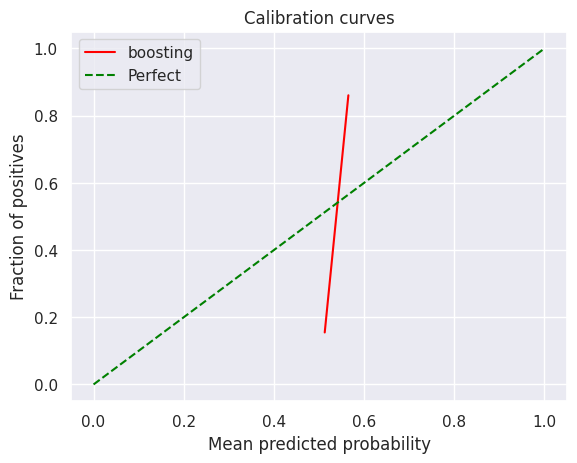

In [79]:
from sklearn.calibration import calibration_curve

best_params = study_boosting.best_trial.params

boosting = Boosting(
    base_model_params={
        "max_depth": best_params.get("max_depth"),
        "min_samples_split": best_params.get("min_samples_split"),
        "min_samples_leaf": best_params.get("min_samples_leaf"),
    },
    n_estimators=best_params.get("n_estimators"),
    learning_rate=best_params.get("learning_rate"),
    early_stopping_rounds=best_params.get("early_stopping_rounds"),
    subsample=best_params.get("subsample"),
    bootstrap_type=best_params.get("bootstrap_type"),
    goss=best_params.get("goss"),
    goss_k=best_params.get("goss_k"),
    dart=best_params.get("dart"),
    dropout_rate=best_params.get("dropout_rate"))
boosting.fit(x_train, y_train, x_valid, y_valid)
boosting_preds = boosting.predict_proba(x_test)[:, 1]
boosting_trues, boosting_preds = calibration_curve(y_test, boosting_preds, n_bins=15)

plt.plot(boosting_preds, boosting_trues, label='boosting', color='red')
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curves')
plt.legend()
plt.show()

Получилось очень плохо, если честно


Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [80]:
#сначала сделаю кривую для самого обычного моего бустинга

basic_boosting = Boosting(n_estimators=100)
basic_boosting.fit(x_train, y_train, x_valid, y_valid)
basic_boosting_preds = basic_boosting.predict_proba(x_test)[:, 1]
basic_boosting_trues, basic_boosting_preds = calibration_curve(y_test, basic_boosting_preds, n_bins=15)

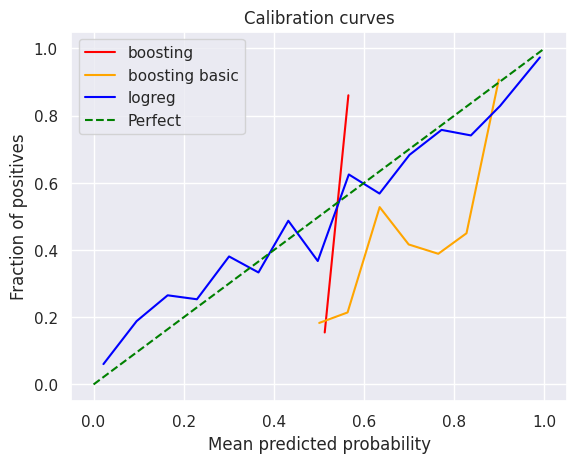

In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
logreg_preds = model.predict_proba(x_test)[:, 1]
logreg_trues, logreg_preds = calibration_curve(y_test, logreg_preds, n_bins=15)

plt.plot(boosting_preds, boosting_trues, label='boosting', color='red')
plt.plot(basic_boosting_preds, basic_boosting_trues, label='boosting basic', color='orange')
plt.plot(logreg_preds, logreg_trues, label='logreg', color='blue')
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curves')
plt.legend()
plt.show()

Логрег делает неплохо приближает к идеальной калибровочной кривой, а бустинг - очень плохо. Хотя если поменять параметры, то станет лучше, но все еще плохо.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

<a href="https://ibb.co/Lt1ZQqm"><img src="https://i.ibb.co/fpHx8Kf/IMG-0543.jpg" alt="IMG-0543" border="0"></a>

**на этой фото 2.5 балла**

# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

От 2025 года я жду МО-2, Кол Финансы и Стохан/Аналитику данных (еще не выбрал), потом я нахожу стажировку/работу к лету и дальше много работаю:)
Параллельно с этим я много играю в футбол, провожу время с друзьями и еще больше в коворке s617!
И вообще все будет хорошо, хватит нам ужасных годов ахахаха)